<a href="https://colab.research.google.com/github/BhavaniAM/Project1/blob/main/Compressive_Sensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cvxpy as cp
import numpy as np
import osqp

In [2]:
print(cp.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCIPY', 'SCS']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
C = np.load('/content/drive/MyDrive/MFDS_Project_1/C.npy').astype(np.float64)
y = np.load('/content/drive/MyDrive/MFDS_Project_1/y.npy').astype(np.int64)
y = np.squeeze(y)
A_inv = np.load('/content/drive/MyDrive/MFDS_Project_1/A_inv.npy').astype(np.float64)
C.shape, y.shape, A_inv.shape

((2820, 9400), (2820,), (9400, 9400))

In [5]:
s = cp.Variable(C.shape[1])
print(s.shape)
# np.linalg.norm(s)#, ord = 1)sum(abs(s)),[y == C@s])#
prob = cp.Problem(cp.Minimize(cp.norm(s,1)),[y == C@s])#,[cp.norm(y - C@s, 2) == 0])
# dccp.is_dccp(prob)
result = prob.solve(solver=cp.OSQP)
print(s.value)

(9400,)
[ 8.33215658e+03  1.04315100e+03 -3.97791252e-03 ... -1.84086563e-02
  4.50643805e+00 -1.39786001e-02]


In [6]:
np.save('/content/drive/MyDrive/MFDS_Project_1/s.npy', s.value)

In [7]:
x = A_inv@s.value

In [8]:
np.save('/content/drive/MyDrive/MFDS_Project_1/x',x)

(100, 94, 3)


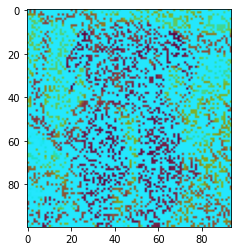

In [9]:
import cv2
import matplotlib.pyplot as plt

img = np.array(cv2.imread('/content/drive/MyDrive/MFDS_Project_1/incomplete.png'))
print(img.shape)
plt.imshow(img)

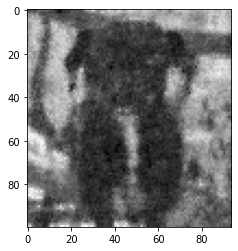

In [10]:
plt.imshow(x.reshape(img.shape[1],img.shape[0]).T,cmap='gray')